In [30]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [84]:
start_row = 25000
row_request = 10000
lrides = pd.read_json("https://data.cityofchicago.org/resource/t2rn-p8d7.json?$limit=" + str(row_request) + "&$offset=" + str(start_row))
lrides['date_time'] = pd.to_datetime(lrides.month_beginning)
lrides.tail()

,station_id,stationame,month_beginning,avg_weekday_rides,avg_saturday_rides,avg_sunday_holiday_rides,monthtotal,date_time
8326,40760,Granville,2020-06-01T00:00:00.000,617.5,454.3,385.3,16943,2020-06-01
8327,41300,Loyola,2020-06-01T00:00:00.000,745.6,615.3,526.5,20971,2020-06-01
8328,40100,Morse,2020-06-01T00:00:00.000,899.5,703.8,625.8,25106,2020-06-01
8329,41190,Jarvis,2020-06-01T00:00:00.000,309.8,251.0,227.5,8730,2020-06-01
8330,40900,Howard,2020-06-01T00:00:00.000,1491.8,1221.0,979.8,41622,2020-06-01


In [90]:
rides_marjun_2019 = lrides[(lrides['date_time'] >= '03/01/2019') & (lrides['date_time'] < '06/30/2019')]
rides_juloct_2019 = lrides[(lrides['date_time'] >= '07/01/2019') & (lrides['date_time'] < '10/31/2019')]
rides_novfeb_2019 = lrides[(lrides['date_time'] >= '11/01/2019') & (lrides['date_time'] < '02/29/2020')]
rides_marjun_2020 = lrides[(lrides['date_time'] >= '03/01/2020') & (lrides['date_time'] < '06/30/2020')]

,station_id,stationame,month_beginning,avg_weekday_rides,avg_saturday_rides,avg_sunday_holiday_rides,monthtotal,date_time
7759,40380,Clark/Lake,2020-03-01T00:00:00.000,9805.2,2490.5,2283.8,237096,2020-03-01
7760,40260,State/Lake,2020-03-01T00:00:00.000,6059.7,2731.0,2302.4,155750,2020-03-01
7761,41700,Washington/Wabash,2020-03-01T00:00:00.000,5241.2,2386.3,1936.2,134533,2020-03-01
7762,40680,Adams/Wabash,2020-03-01T00:00:00.000,3654.5,1418.5,990.2,91024,2020-03-01
7763,40850,Library,2020-03-01T00:00:00.000,2011.6,841.0,711.8,51178,2020-03-01
...,...,...,...,...,...,...,...,...
8326,40760,Granville,2020-06-01T00:00:00.000,617.5,454.3,385.3,16943,2020-06-01
8327,41300,Loyola,2020-06-01T00:00:00.000,745.6,615.3,526.5,20971,2020-06-01
8328,40100,Morse,2020-06-01T00:00:00.000,899.5,703.8,625.8,25106,2020-06-01
8329,41190,Jarvis,2020-06-01T00:00:00.000,309.8,251.0,227.5,8730,2020-06-01


/Users/eliharrell/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/Users/eliharrell/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/Users/eliharrell/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures crea

/Users/eliharrell/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/Users/eliharrell/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/Users/eliharrell/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures crea

/Users/eliharrell/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/Users/eliharrell/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/Users/eliharrell/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures crea

/Users/eliharrell/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/Users/eliharrell/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/Users/eliharrell/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures crea

/Users/eliharrell/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/Users/eliharrell/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/Users/eliharrell/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures crea

/Users/eliharrell/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/Users/eliharrell/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/Users/eliharrell/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures crea

stationame
18th                   AxesSubplot(0.125,0.125;0.775x0.755)
35-Bronzeville-IIT     AxesSubplot(0.125,0.125;0.775x0.755)
35th/Archer            AxesSubplot(0.125,0.125;0.775x0.755)
43rd                   AxesSubplot(0.125,0.125;0.775x0.755)
47th-Dan Ryan          AxesSubplot(0.125,0.125;0.775x0.755)
                                       ...                 
Western-Cermak         AxesSubplot(0.125,0.125;0.775x0.755)
Western-Forest Park    AxesSubplot(0.125,0.125;0.775x0.755)
Western-Orange         AxesSubplot(0.125,0.125;0.775x0.755)
Western/Milwaukee      AxesSubplot(0.125,0.125;0.775x0.755)
Wilson                    AxesSubplot(0.125,0.2;0.775x0.68)
Length: 145, dtype: object

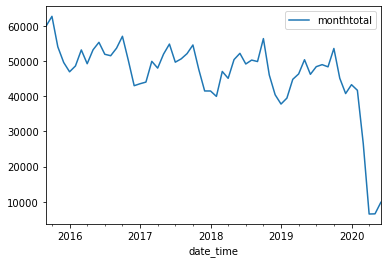

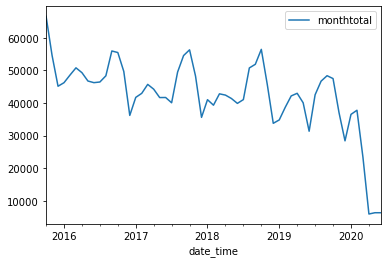

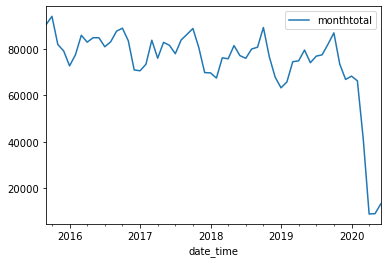

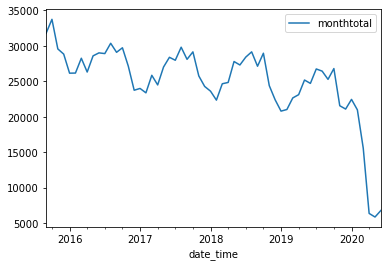

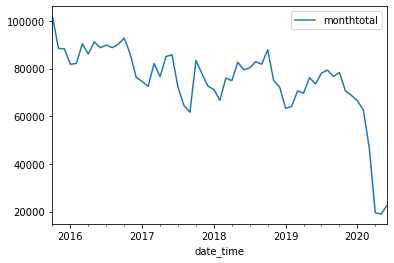

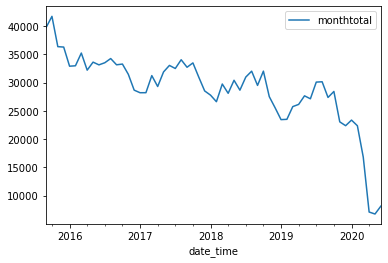

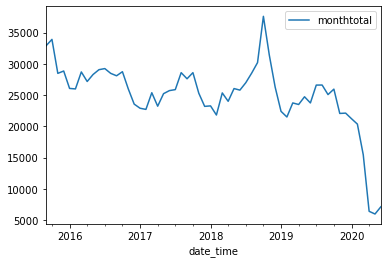

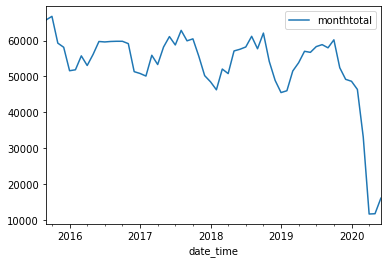

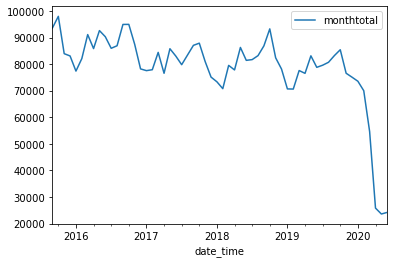

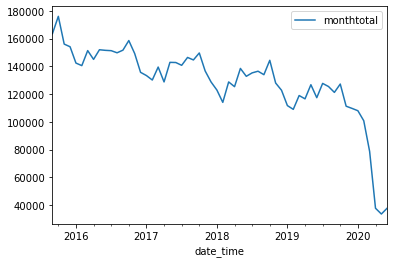

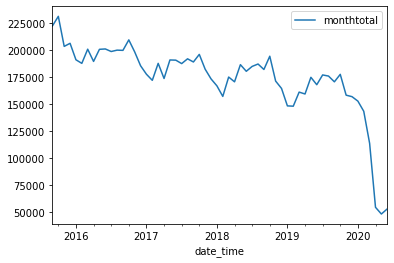

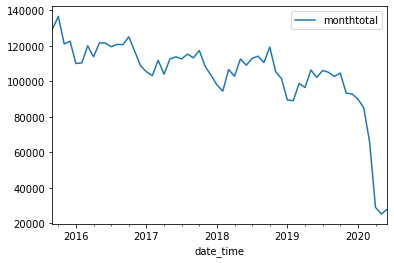

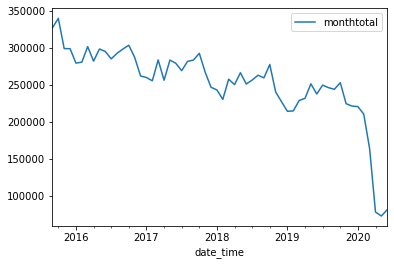

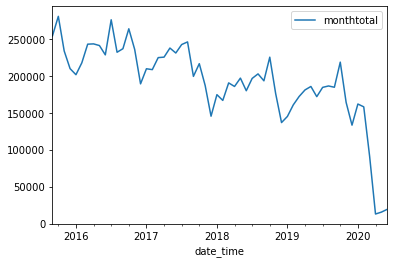

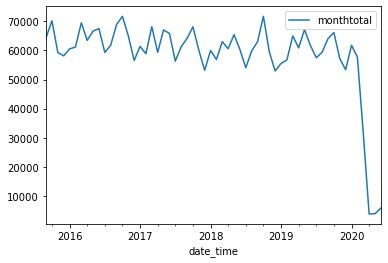

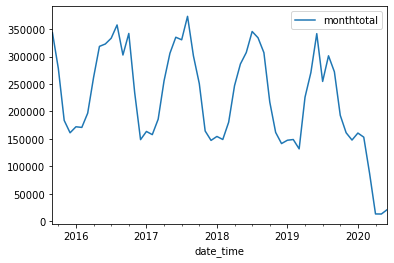

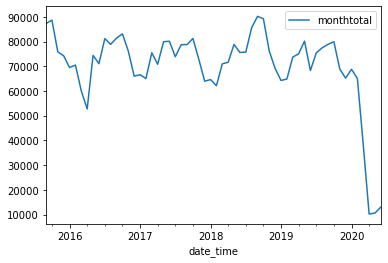

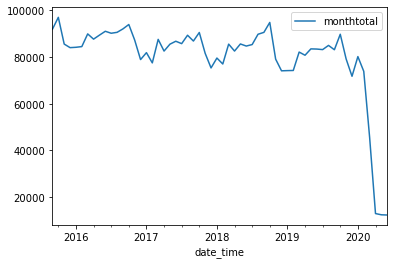

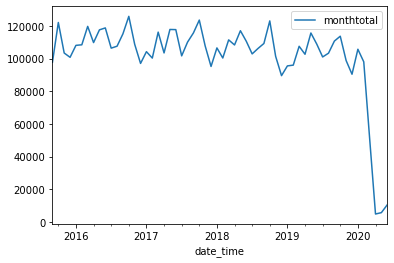

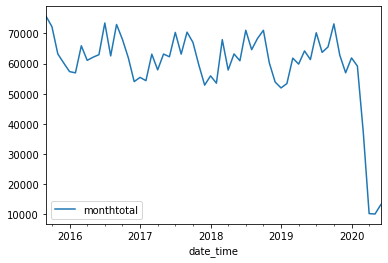

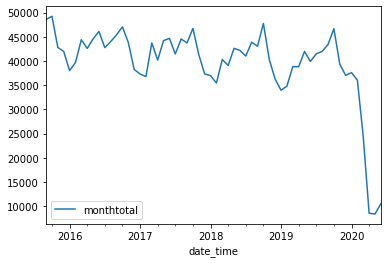

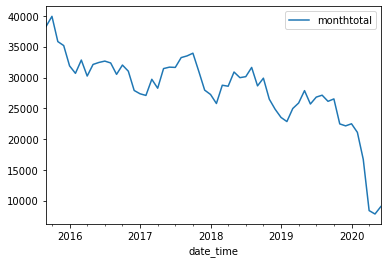

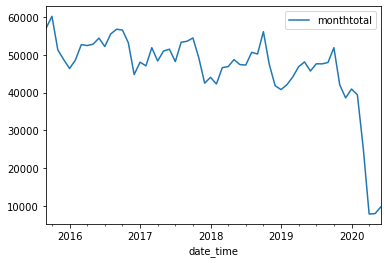

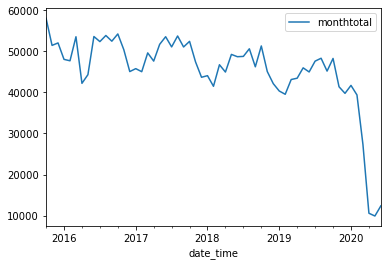

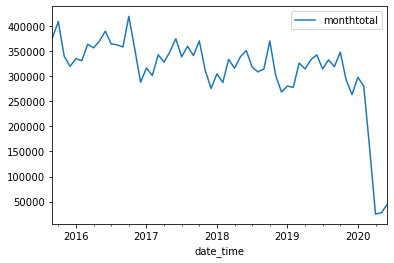

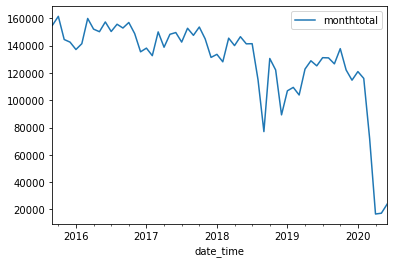

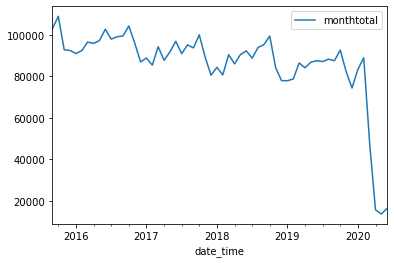

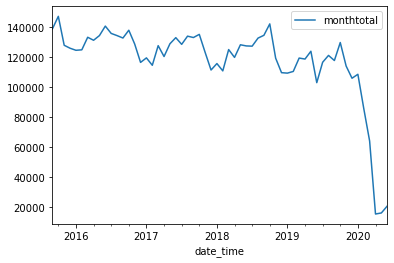

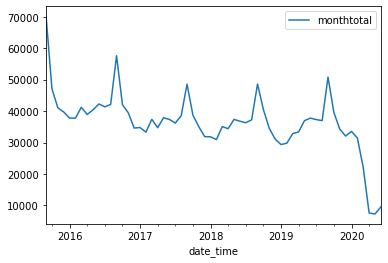

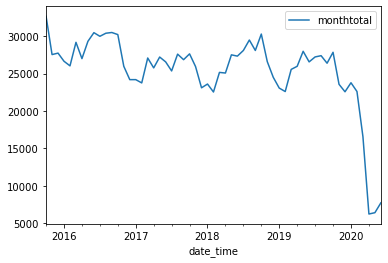

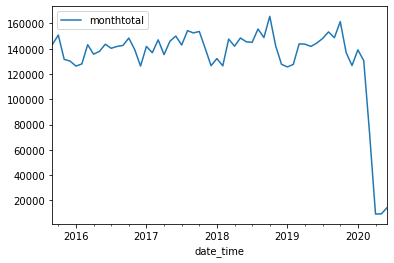

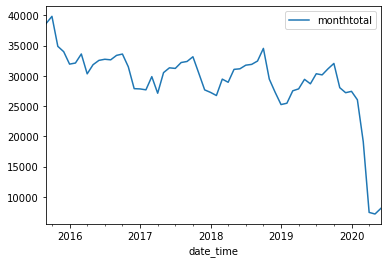

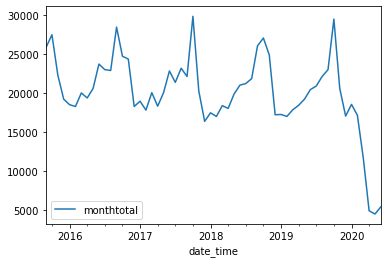

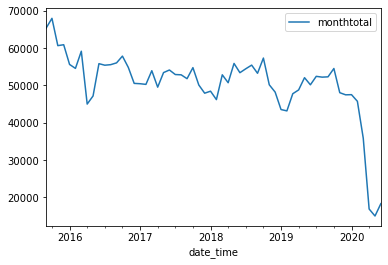

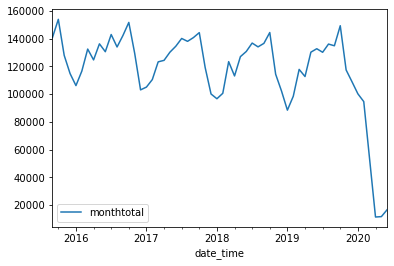

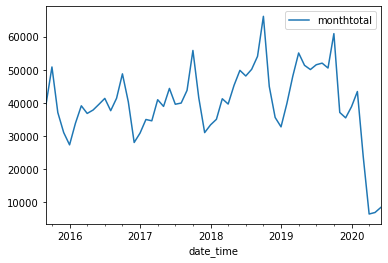

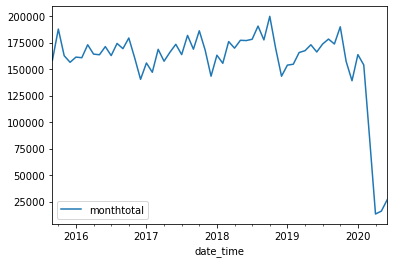

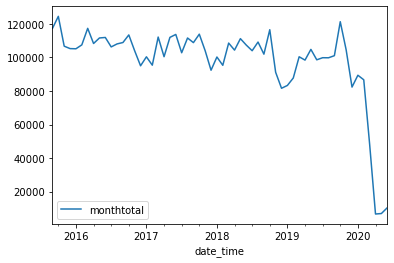

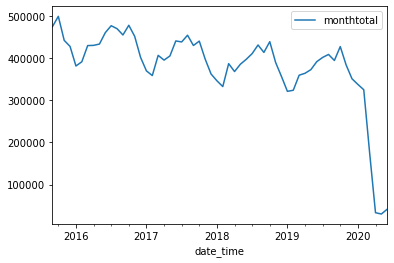

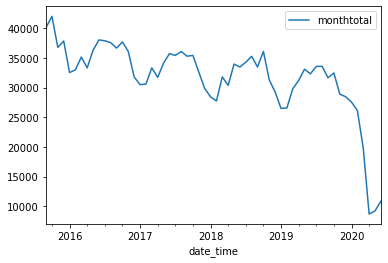

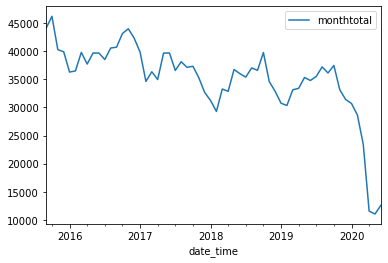

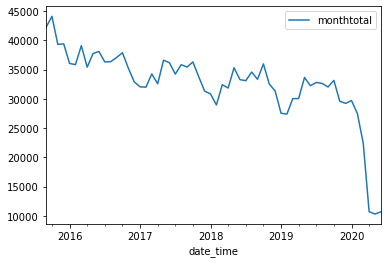

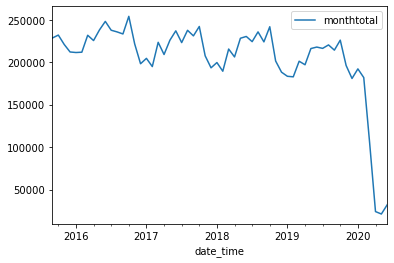

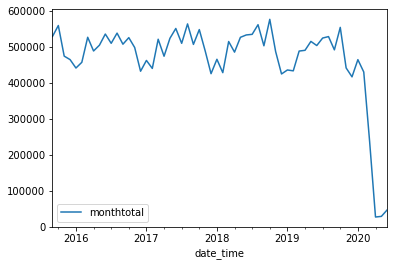

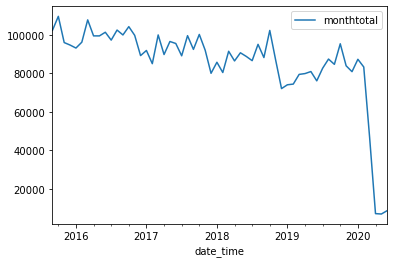

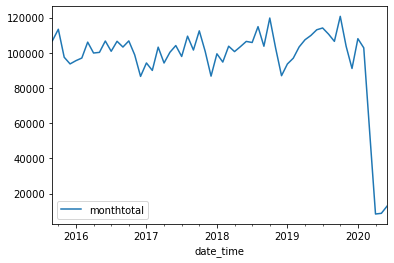

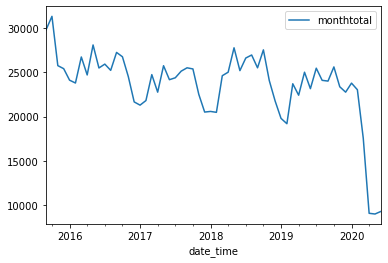

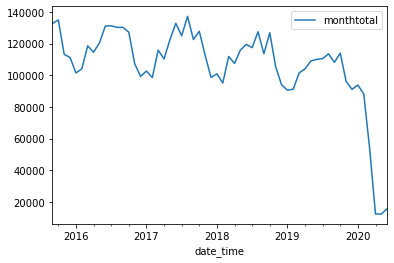

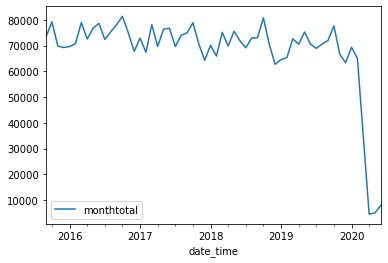

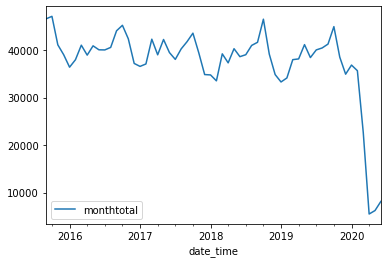

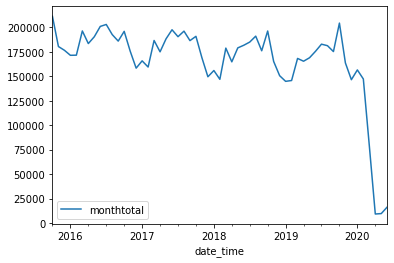

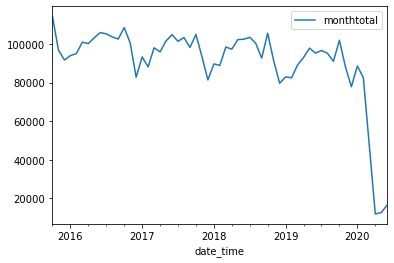

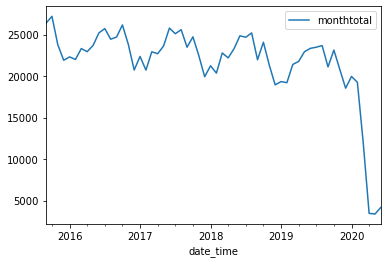

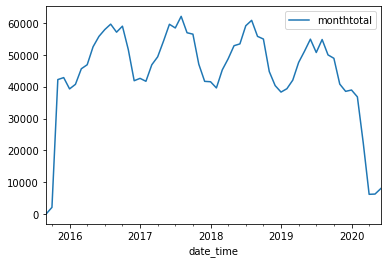

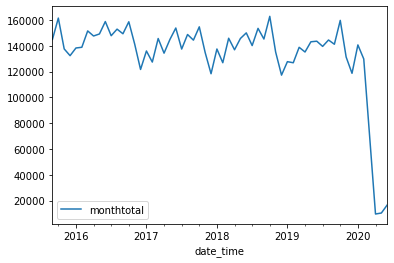

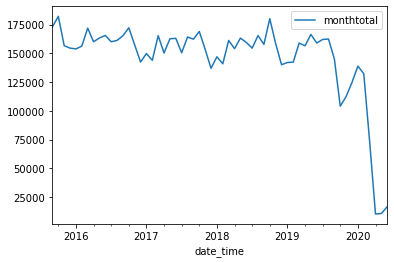

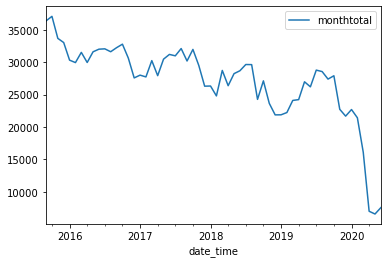

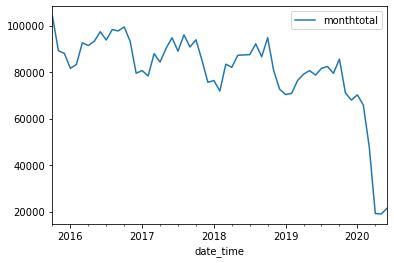

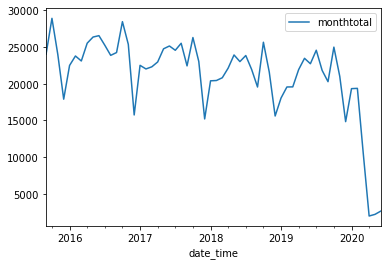

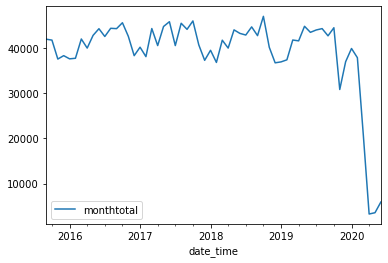

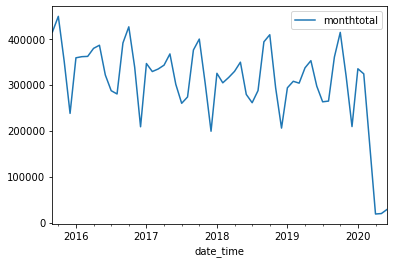

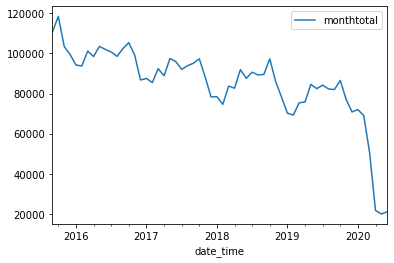

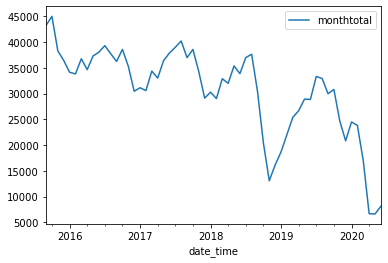

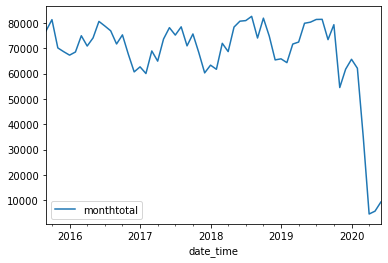

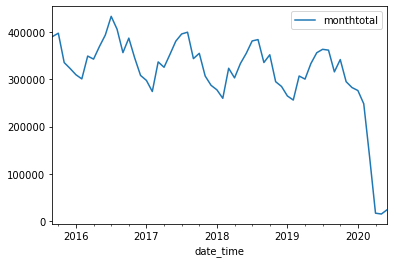

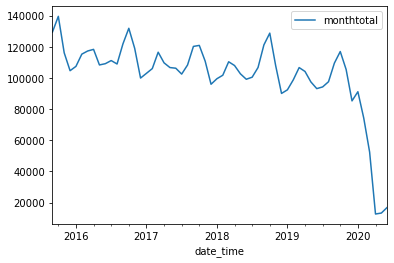

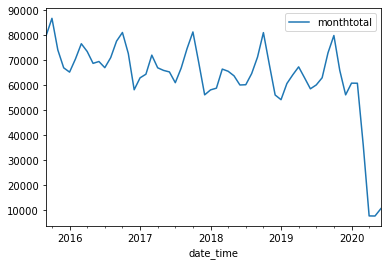

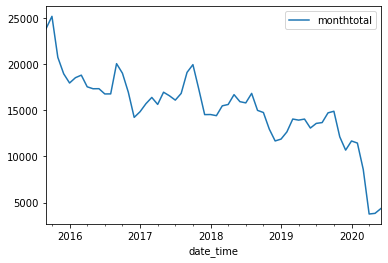

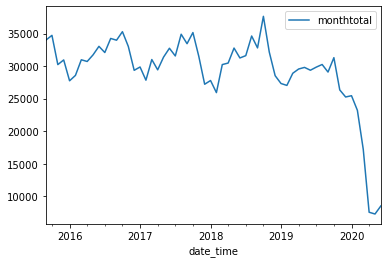

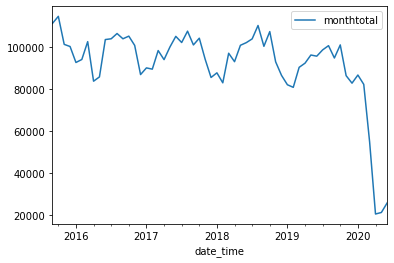

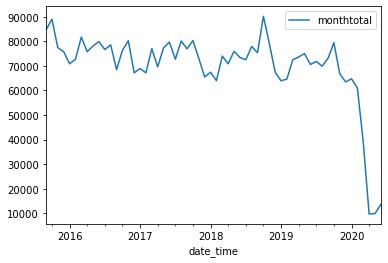

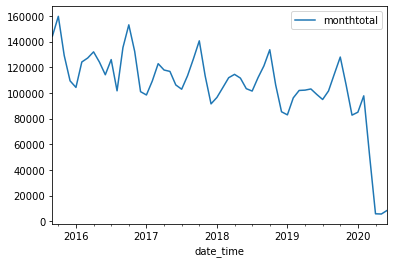

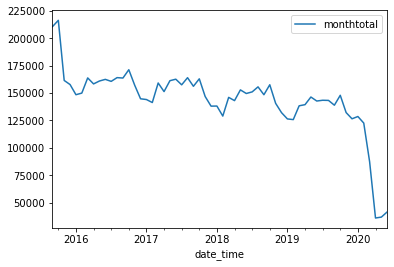

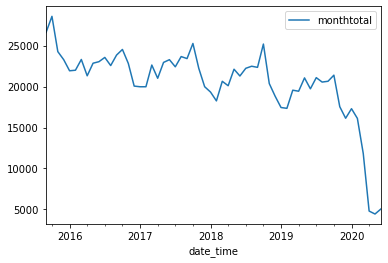

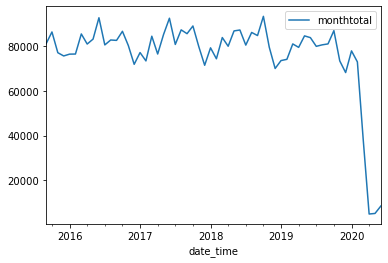

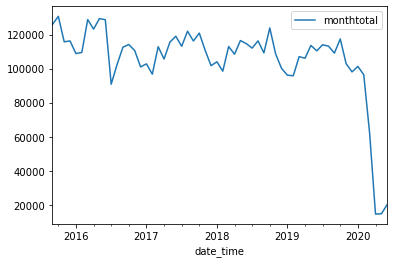

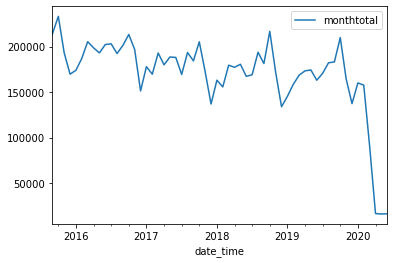

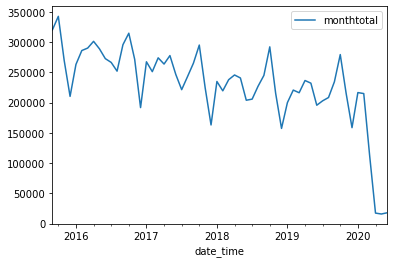

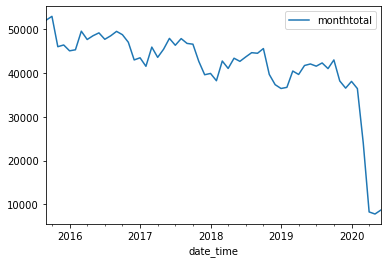

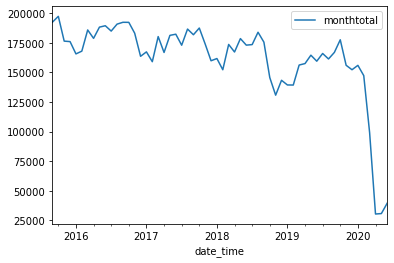

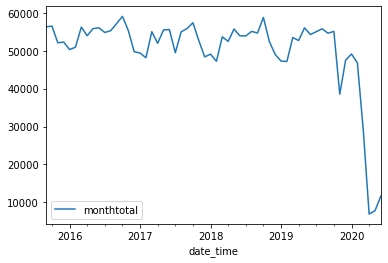

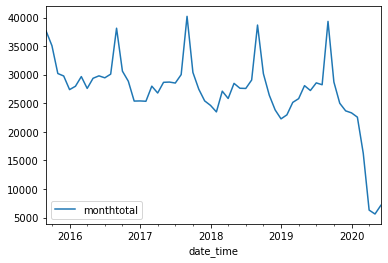

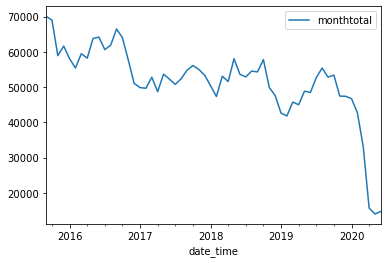

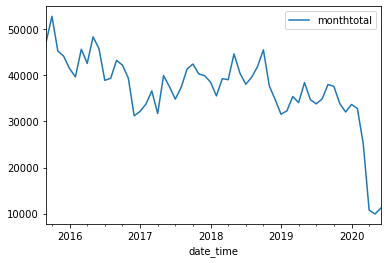

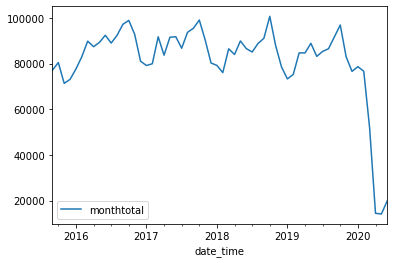

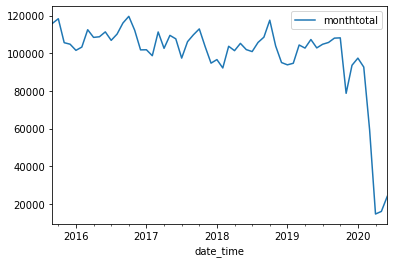

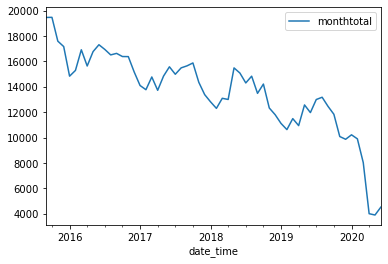

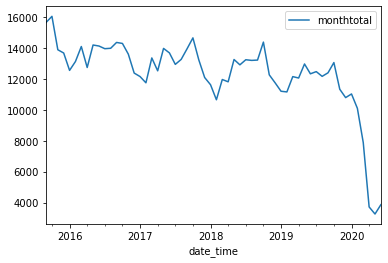

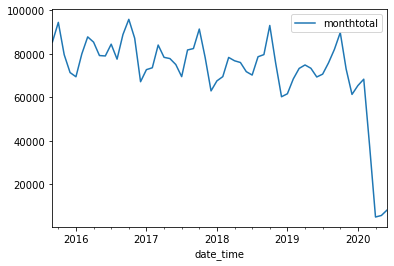

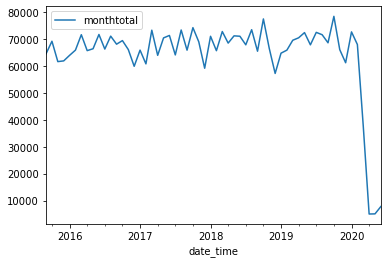

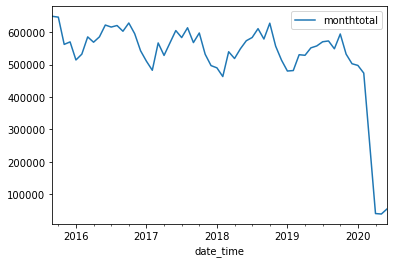

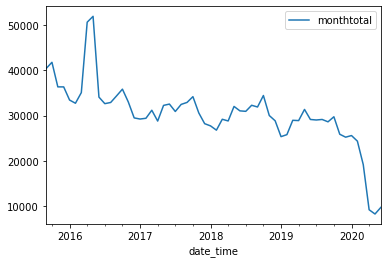

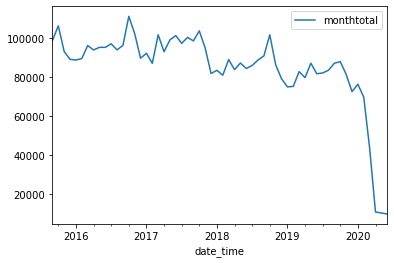

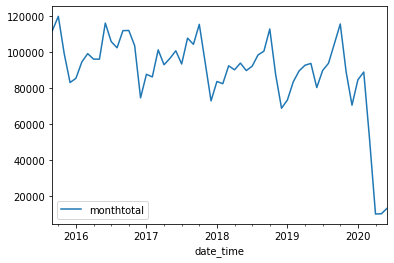

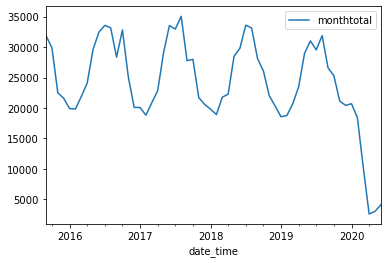

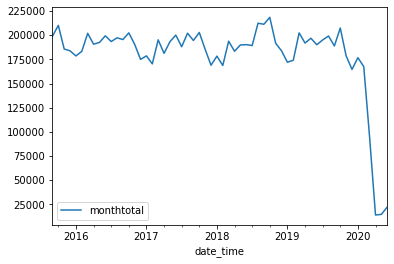

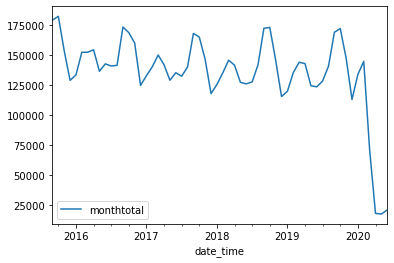

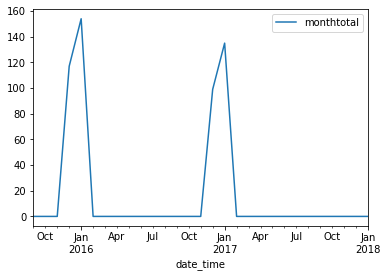

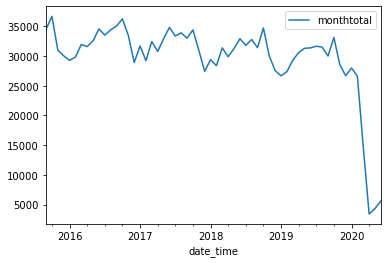

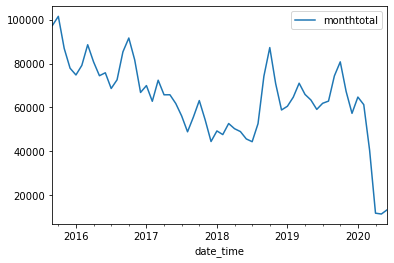

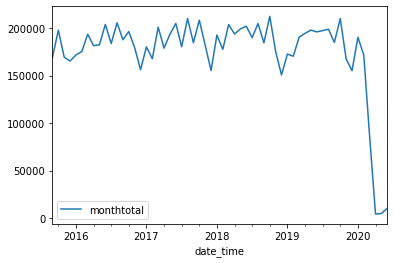

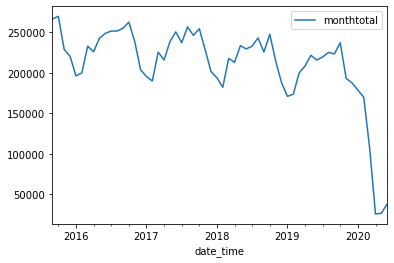

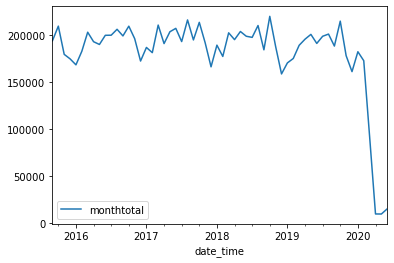

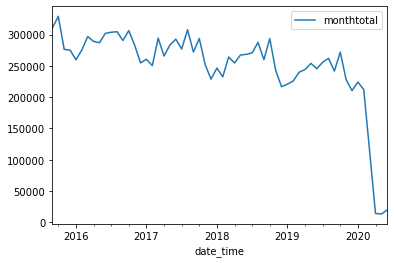

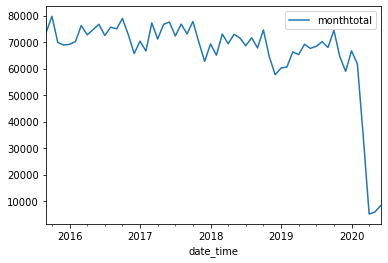

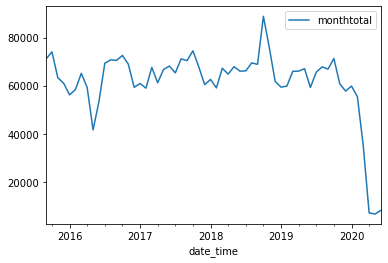

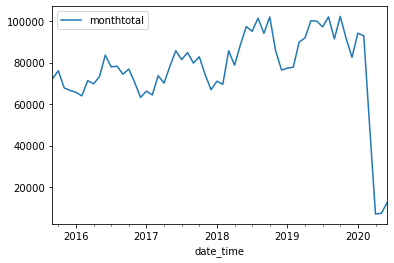

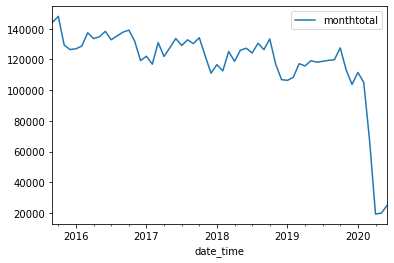

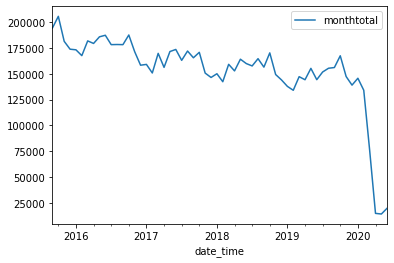

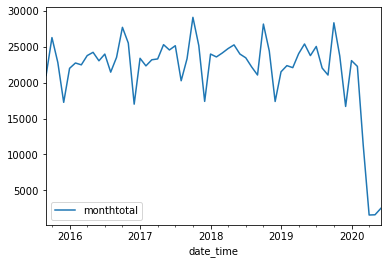

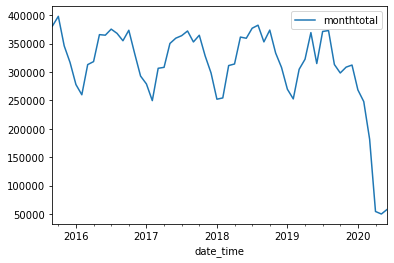

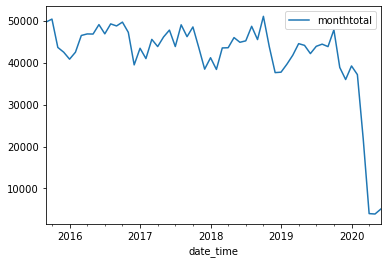

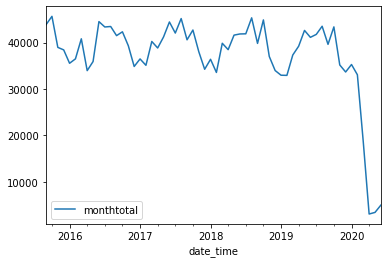

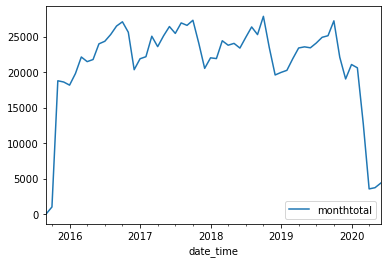

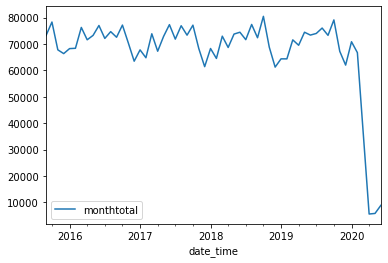

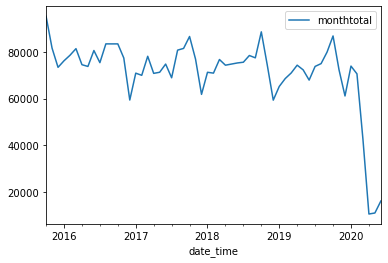

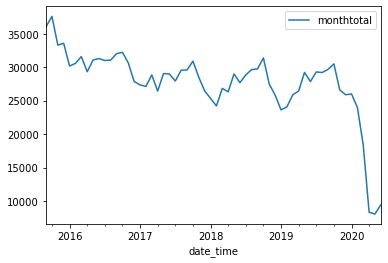

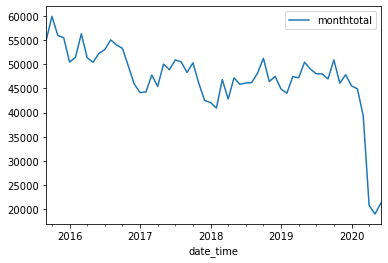

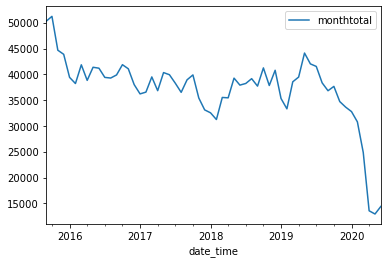

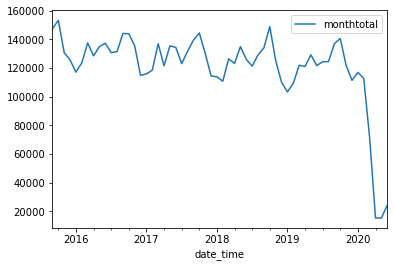

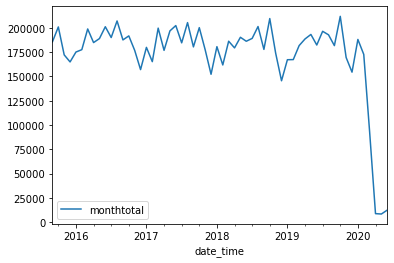

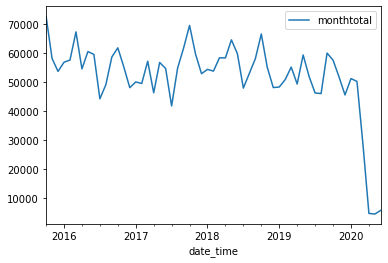

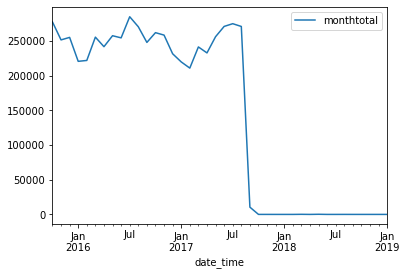

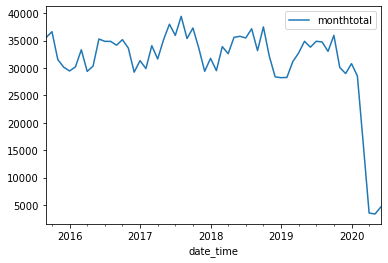

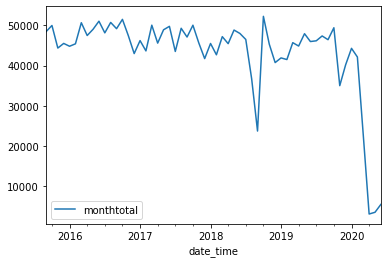

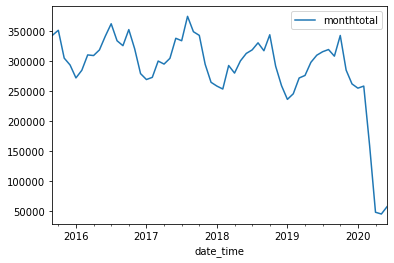

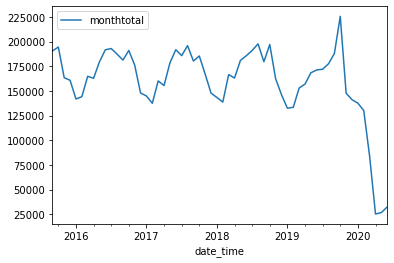

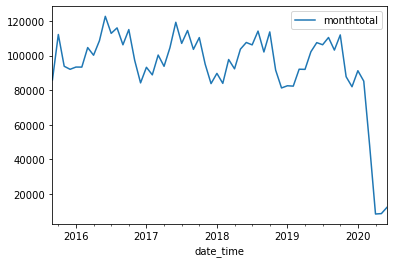

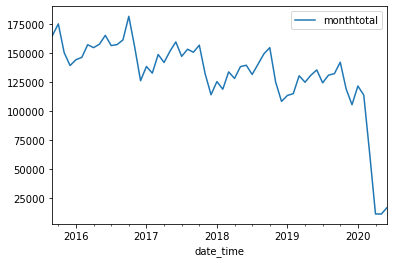

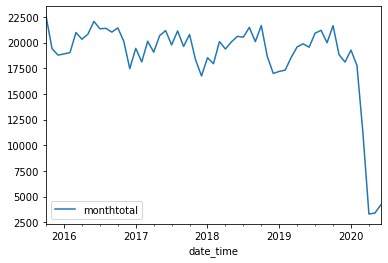

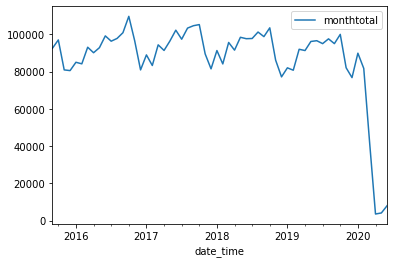

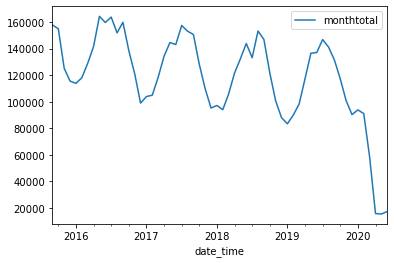

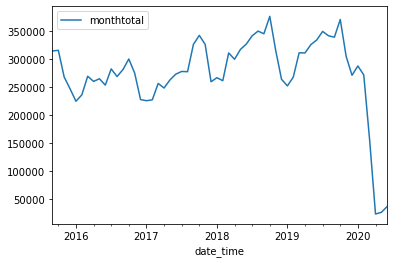

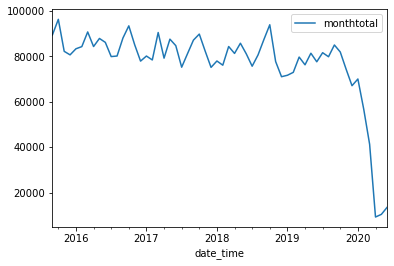

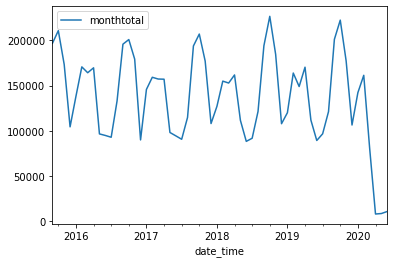

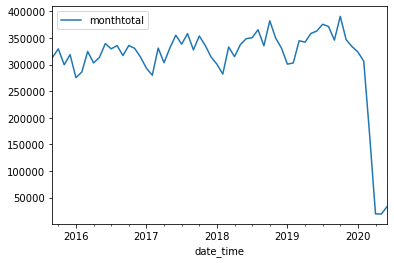

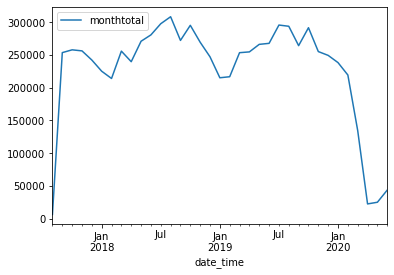

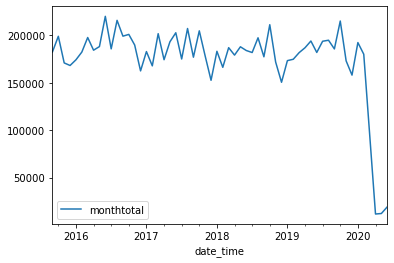

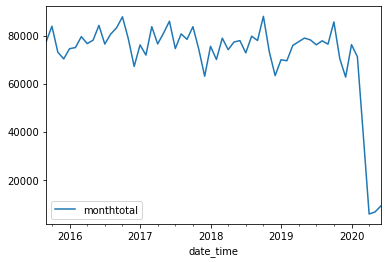

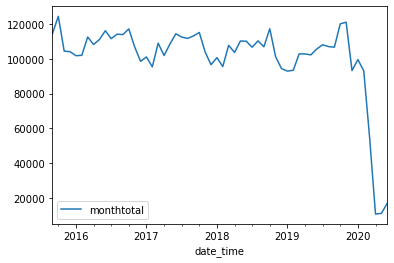

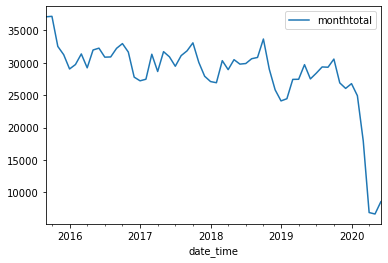

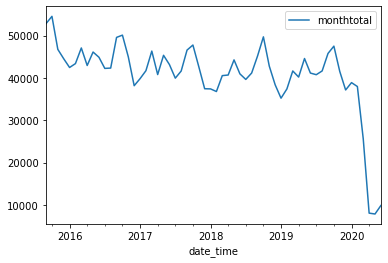

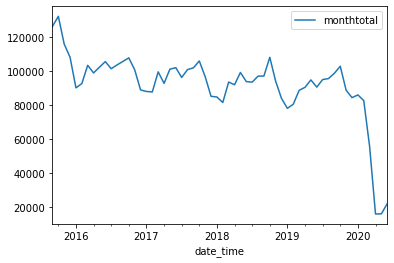

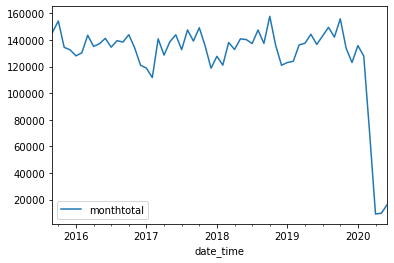

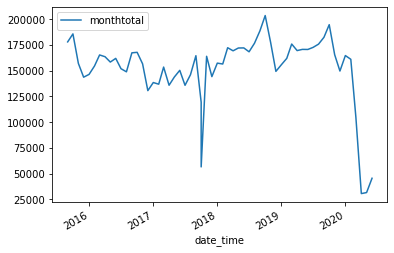

In [133]:
station_group = lrides.groupby(['stationame'])
station_group = pd.DataFrame(station_group['monthtotal'])